<a href="https://colab.research.google.com/github/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/blob/main/q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loaad .py module
!wget https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/data_hoda.py

--2024-09-22 12:40:22--  https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/data_hoda.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1092 (1.1K) [text/plain]
Saving to: ‘data_hoda.py’

data_hoda.py        100%[===================>]   1.07K  --.-KB/s    in 0s      

2024-09-22 12:40:22 (30.3 MB/s) - ‘data_hoda.py’ saved [1092/1092]



In [2]:
!wget https://github.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/raw/refs/heads/main/dataset/Data_hoda_full.mat -P dataset

--2024-09-22 12:40:24--  https://github.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/raw/refs/heads/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/dataset/Data_hoda_full.mat [following]
--2024-09-22 12:40:25--  https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/dataset/Data_hoda_full.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989009 (3.8M) [application/octet-stream]
Saving to: ‘dataset/Data_hoda_ful

In [3]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deep-1402/refs/heads/master/images/persian-digits.jpg

--2024-09-22 12:40:31--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deep-1402/refs/heads/master/images/persian-digits.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41970 (41K) [image/jpeg]
Saving to: ‘persian-digits.jpg’

persian-digits.jpg  100%[===================>]  40.99K  --.-KB/s    in 0.008s  

2024-09-22 12:40:32 (4.94 MB/s) - ‘persian-digits.jpg’ saved [41970/41970]



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import cv2
from google.colab.patches import cv2_imshow

from data_hoda import knn_classifier,load_hoda

In [88]:
x_train,y_train,x_test,y_test=load_hoda(size=20,training_sample_size=4800)

In [122]:
#test this change:) and fit model

model=KNeighborsClassifier(n_neighbors=3)
model=model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.99


array([[201, 201, 201, ..., 178, 177, 177],
       [201, 201, 201, ..., 178, 178, 177],
       [202, 202, 202, ..., 179, 178, 178],
       ...,
       [146, 146, 146, ..., 188, 187, 186],
       [145, 146, 145, ..., 188, 187, 186],
       [144, 145, 145, ..., 187, 187, 186]], dtype=uint8)
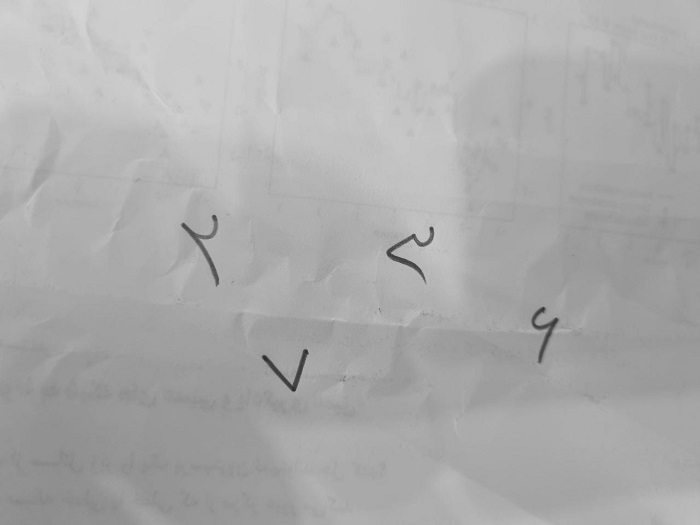

In [137]:
image = cv2.imread('persian-digits.jpg', cv2.IMREAD_GRAYSCALE)
image

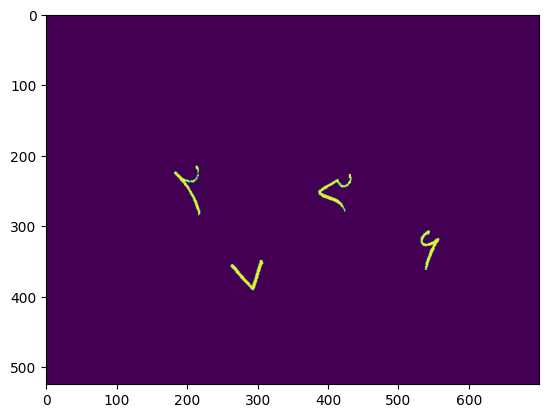

In [183]:
_, binary_image = cv2.threshold(image,113 , 255, cv2.THRESH_BINARY)
binary_image=255-binary_image
plt.imshow(binary_image)

In [184]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
num_labels

5

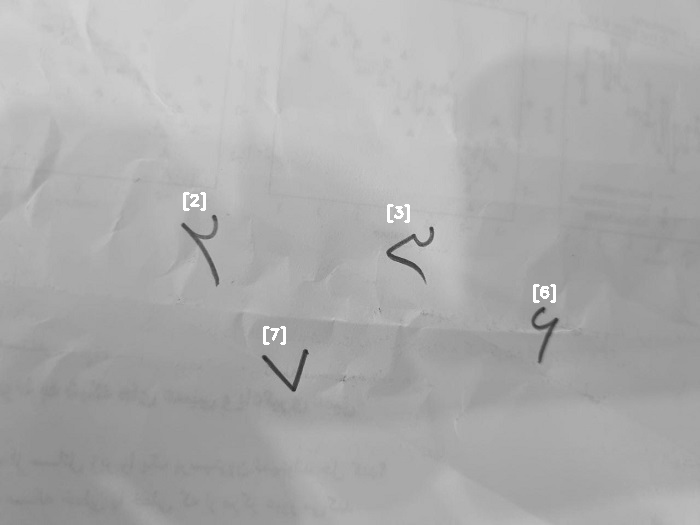

In [185]:
for label in range(1, num_labels):
    x, y, w, h = stats[label][:4]
    connected_component = binary_image[y:y+h, x:x+w]

    #resize
    rcomponent = cv2.resize(connected_component, (20, 20))

    #reshape
    rc=np.reshape(rcomponent,[20**2])
    rc= rc.astype(dtype='uint8')

#rc.dtype
    #predict:
    prediction = model.predict([rc])
    cv2.putText(image, str(prediction), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

cv2_imshow(image)